# Uber Movemnet

data waggling and exploring

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot as plt
import json

Soure data: https://movement.uber.com/explore/washington_DC/travel-times/query?si=186&ti=413&ag=censustracts&dt[tpb]=ALL_DAY&dt[wd;]=1,2,3,4,5,6,7&dt[dr][sd]=2020-03-01&dt[dr][ed]=2020-03-31&cd=&sa;=&sdn=&ta;=&tdn=&lang=en-US

In [2]:
# read dataset
data = pd.read_csv("washington_DC-censustracts-2020-1-All-DatesByHourBucketsAggregate.csv")
data.head()

sourceid  dstid  month  day  start_hour  end_hour  mean_travel_time  \
0       107    541      2    7          19         0            429.53   
1       509    186      2   15          19         0           1523.17   
2       509    186      1   25          19         0           1390.58   
3       128    331      1   17          19         0            278.25   
4       182    222      1   10           0         7            651.40   

   standard_deviation_travel_time  geometric_mean_travel_time  \
0                          129.41                      415.75   
1                          466.17                     1469.64   
2                          334.44                     1356.56   
3                          159.22                      239.90   
4                          270.81                      612.19   

   geometric_standard_deviation_travel_time  
0                                      1.27  
1                                      1.29  
2                                      1.24  
3                                      1.71  
4                                      1.39

In [3]:
for col in data.columns:
    print(col)

sourceid
dstid
month
day
start_hour
end_hour
mean_travel_time
standard_deviation_travel_time
geometric_mean_travel_time
geometric_standard_deviation_travel_time


In [4]:
data.shape

(19430872, 10)

In [5]:
#list any value that is nan, False returned, which means no nan inside
data.isnull().values.any()

False

In [6]:
#check sourceid
data.sourceid.unique()

array([107, 509, 128, 182, 133, 132,  92,  75, 376, 183, 429, 428, 520,
       385,  53, 541,  58, 142, 400, 426, 121, 120, 101, 100,  57, 148,
       419,  55, 457, 360, 415, 122, 368, 371, 383, 511, 143, 361, 460,
       523, 346, 347, 343,  20,  61, 237, 280, 524, 502, 301, 199,  56,
       536, 370, 486, 484, 459,  74,  60, 318, 106, 147, 447, 190, 191,
       358,  30,  52, 387, 382,  10, 369, 392, 218, 219,  94,  19, 505,
       312, 381, 129, 112, 294, 116, 290,  26,   7, 384, 119, 139, 109,
         8, 103, 350,  44, 345, 193, 367, 296, 295, 402,  96,  98, 135,
        50, 223, 226, 134, 249,  39,  64, 228,  66, 395, 243,  15, 342,
       163, 158, 555, 168, 553, 558, 203, 332, 201, 162, 166, 114, 117,
       105, 144, 160, 154, 513, 161,  46, 463, 438, 436, 131,  45, 432,
       164, 437, 153, 189, 516, 548, 519, 512, 325,  67, 246, 210, 155,
       357, 439, 545, 354, 365, 517, 483, 489, 108, 339,  54, 472,  41,
       236, 293, 299, 433,  27, 406, 341, 279, 283, 209, 157, 25

<AxesSubplot:>

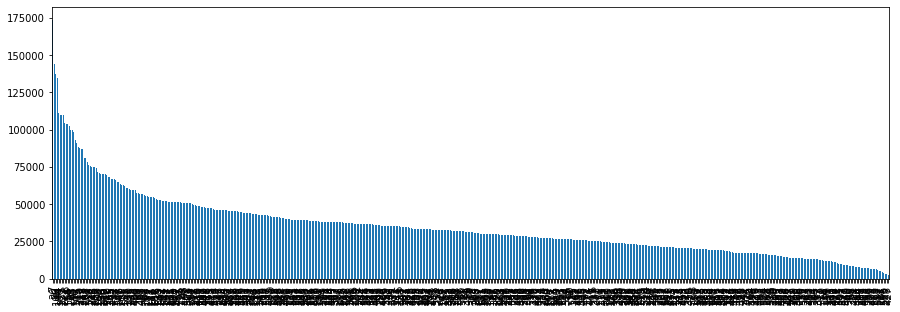

In [7]:
data.sourceid.value_counts().plot(kind='bar',figsize=(15,5))

<AxesSubplot:>

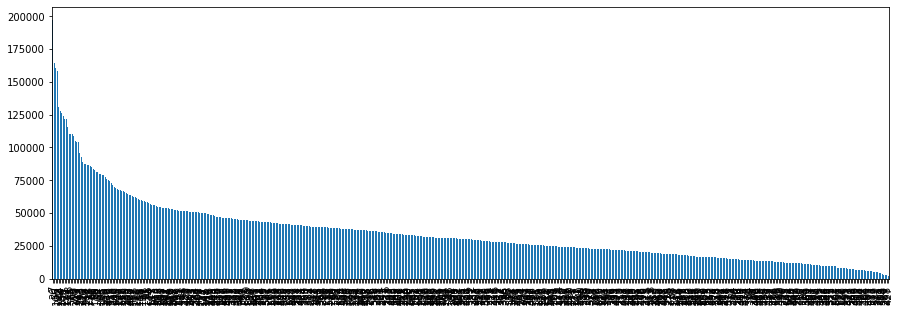

In [8]:
data.dstid.value_counts().plot(kind='bar',figsize=(15,5))

sourcid and dstid seems have similar distribution

In [9]:
with open('washington_DC_censustracts.json') as f:
  CensusTracts = json.load(f)

In [10]:
CensusTracts

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-77.048009, 38.841266],
       [-77.047969, 38.841267],
       [-77.047934, 38.84127],
       [-77.047891, 38.841274],
       [-77.047859, 38.841277],
       [-77.047817, 38.841281],
       [-77.047784, 38.841285],
       [-77.047759, 38.841289],
       [-77.047728, 38.841292],
       [-77.047705, 38.841296],
       [-77.047681, 38.841302],
       [-77.047639, 38.841307],
       [-77.047605, 38.841309],
       [-77.047565, 38.841308],
       [-77.047525, 38.841306],
       [-77.047483, 38.841308],
       [-77.047441, 38.841308],
       [-77.047405, 38.84131],
       [-77.047364, 38.841311],
       [-77.04733, 38.841312],
       [-77.047289, 38.841314],
       [-77.047255, 38.841314],
       [-77.047211, 38.841316],
       [-77.047174, 38.84132],
       [-77.047129, 38.84132],
       [-77.047091, 38.841319],
       [-77.047051, 38.841316],
       [-77.047011, 38

CenusTracts Json Data Structure:<br>
{"type":"FeatureCollection","features":[<br>
  {'type': 'Feature',<br>
   'geometry': {'type': 'MultiPolygon',<br>
    'coordinates': [[[[-77.078289, 38.880164],<br>
       [-77.076861, 38.881864],<br>
       [-77.073343, 38.88606],<br>
        ...<br>
       [-77.033179, 38.855656],<br>
       [-77.033165, 38.855635],<br>
       ...]]]},<br>
     'properties': {'MOVEMENT_ID': '19',<br>
     'DISPLAY_NAME': 'Thomas Avenue, Arlington'}},<br>
    ...<br>
]}    

In [11]:
data['year']=2020
data.head()

sourceid  dstid  month  day  start_hour  end_hour  mean_travel_time  \
0       107    541      2    7          19         0            429.53   
1       509    186      2   15          19         0           1523.17   
2       509    186      1   25          19         0           1390.58   
3       128    331      1   17          19         0            278.25   
4       182    222      1   10           0         7            651.40   

   standard_deviation_travel_time  geometric_mean_travel_time  \
0                          129.41                      415.75   
1                          466.17                     1469.64   
2                          334.44                     1356.56   
3                          159.22                      239.90   
4                          270.81                      612.19   

   geometric_standard_deviation_travel_time  year  
0                                      1.27  2020  
1                                      1.29  2020  
2                                      1.24  2020  
3                                      1.71  2020  
4                                      1.39  2020

In [12]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.head()

sourceid  dstid  month  day  start_hour  end_hour  mean_travel_time  \
0       107    541      2    7          19         0            429.53   
1       509    186      2   15          19         0           1523.17   
2       509    186      1   25          19         0           1390.58   
3       128    331      1   17          19         0            278.25   
4       182    222      1   10           0         7            651.40   

   standard_deviation_travel_time  geometric_mean_travel_time  \
0                          129.41                      415.75   
1                          466.17                     1469.64   
2                          334.44                     1356.56   
3                          159.22                      239.90   
4                          270.81                      612.19   

   geometric_standard_deviation_travel_time  year       date  
0                                      1.27  2020 2020-02-07  
1                                      1.29  2020 2020-02-15  
2                                      1.24  2020 2020-01-25  
3                                      1.71  2020 2020-01-17  
4                                      1.39  2020 2020-01-10

In [13]:
data.columns

Index(['sourceid', 'dstid', 'month', 'day', 'start_hour', 'end_hour',
       'mean_travel_time', 'standard_deviation_travel_time',
       'geometric_mean_travel_time',
       'geometric_standard_deviation_travel_time', 'year', 'date'],
      dtype='object')

In [14]:
data.dtypes

sourceid                                             int64
dstid                                                int64
month                                                int64
day                                                  int64
start_hour                                           int64
end_hour                                             int64
mean_travel_time                                   float64
standard_deviation_travel_time                     float64
geometric_mean_travel_time                         float64
geometric_standard_deviation_travel_time           float64
year                                                 int64
date                                        datetime64[ns]
dtype: object

In [15]:
data['weekday'] = data['date'].dt.dayofweek

In [16]:
data.weekday.unique()

array([4, 5, 0, 1, 3, 6, 2])

<AxesSubplot:title={'center':'Average travel time during weekday'}, xlabel='weekday'>

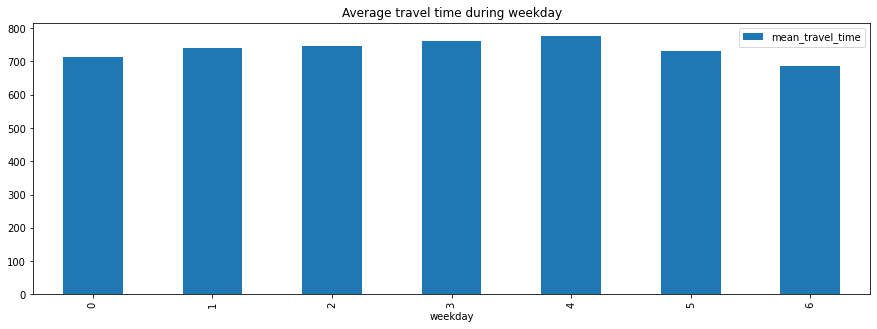

In [17]:
data[['weekday','mean_travel_time']].groupby(by='weekday').mean().plot(kind='bar', figsize=(15,5), title='Average travel time during weekday')

<AxesSubplot:title={'center':'Average travel time by start_hour'}, xlabel='start_hour'>

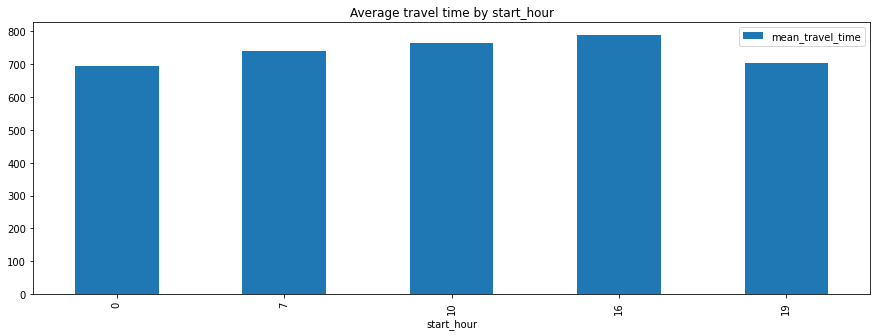

In [18]:
data[['start_hour','mean_travel_time']].groupby(by='start_hour').mean().plot(kind='bar', figsize=(15,5), title='Average travel time by start_hour')

In [19]:
data['start_hour'].unique()

array([19,  0, 16,  7, 10])